https://paperswithcode.com/dataset/ett

In [31]:
#setup names in this data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
hoursoffset=timedelta(hours=48)
date='date'
var='OT'
validation_startpred=datetime(2017, 7, 1)
test_startpred=datetime(2017, 11, 1)
#time to use where prediction begins if using test data
startpred=test_startpred
#if using validation data
#startpred=validation_startpred



#start date for time series selection
start=datetime(2016, 7, 1)
#if usingtest data
#end=datetime(2018, 6, 26, 19)
#end of data selection / start of prediction



# end of prediction (must be <= end of data set please)
end=startpred+hoursoffset

#some extrapolation past end of data if required
extrapred=startpred

print(startpred, end)



2017-11-01 00:00:00 2017-11-03 00:00:00


In [2]:
#location of csv data to load
data_location = 'C:\\Users\\DellAdmin\\Documents\\TUD course\\Data Mining\\Assignment2\\Forecasting\\data\\ETT\\ETTh1.csv'

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv(data_location, sep=',')
#view data frame
df.head(5)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


Summary stats, dataframe shape and type & missing values
Check for any missing values and look at them.  #None

In [3]:
df[df.isna().any(axis=1)]

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17420 non-null  object 
 1   HUFL    17420 non-null  float64
 2   HULL    17420 non-null  float64
 3   MUFL    17420 non-null  float64
 4   MULL    17420 non-null  float64
 5   LUFL    17420 non-null  float64
 6   LULL    17420 non-null  float64
 7   OT      17420 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [5]:
#convert text to date
df[date] = pd.to_datetime(df[date])
df.describe()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000
mean,7.375141,2.242242,4.300239,0.881568,3.066062,0.856932,13.324672
std,7.067744,2.042342,6.826978,1.809293,1.164506,0.599552,8.566946
min,-22.705999,-4.756000,-25.087999,-5.934000,-1.188000,-1.371000,-4.080000
25%,5.827000,0.737000,3.296000,-0.284000,2.315000,0.670000,6.964000
50%,8.774000,2.210000,5.970000,0.959000,2.833000,0.975000,11.396000
75%,11.788000,3.684000,8.635000,2.203000,3.625000,1.218000,18.079000
max,23.643999,10.114000,17.341000,7.747000,8.498000,3.046000,46.007000


In [6]:
#Specific summary stats of interest
print(df.OT.median())
print(df.date.min())
print(df.date.max())
print(df.date.median())

11.395999908447266
2016-07-01 00:00:00
2018-06-26 19:00:00
2017-06-28 21:30:00


In [28]:
# Function to plot cobination plots of full SARIMAX, or arima specialized subset of fits
# @params
# timeseries: original/truth data
# modelsin: dict of models keyed according to str((tuple1), (tuple2)) 
#           the list of SARIMAX or ARIMA params either (p,d,q),(P,D,Q,s) / (p,d,q),(0,0,0,0) / (p,d,q)
#           values are forcasted values for each index
# arima: Whether to select arima (True) or Full SARIMAX (False)
# end: end point of timeseries selection

def test_fits(timeseries, modelsin, arima=False, end=end):
   
   #ordered list of colors to use
   cols=['b','g', 'r', 'c', 'm', 'y', 'k']
   models=modelsin 
   if type(modelsin) != dict:
     print ("convert to dict from",  type(modelsin) )
   f=plt.figure(figsize=(12,8))  
   
   #filter out any non arima plots / filter out all arima plots
   if arima:
        mykeys=[]
        for i in modelsin.keys():
          if (len(i) > 13 and (i[-13:] =="(0, 0, 0, 0))") )  or i[0] !='(' :
             mykeys.append(i)
          else: print ("reject ", i)
        models = { your_key.replace(", (0, 0, 0, 0))", "").replace("((",""): modelsin[your_key] for your_key in mykeys }
   else:
        mykeys=[]
        for i in modelsin.keys():
          if (len(i) > 13 and (i[-13:] !="(0, 0, 0, 0))")) or i[0] !='(' :
             mykeys.append(i)
          else: print ("reject ", i)
        models = { your_key: modelsin[your_key] for your_key in mykeys }
   orig = plt.plot(timeseries[startpred-hoursoffset:end], color = 'black', label = 'Original')
   plt.xticks(rotation=30)
   plt.ylabel("OT")

   coli = 1
   maxcol=len(cols)

   for l, m in models.items():
      #print ("m is:", m)
      plt.plot(m, color = cols[coli], label = l, alpha=0.7)
      coli+=1
      if coli == maxcol:
         coli=1

   plt.legend(loc = 'best')
   plt.title('SARIMAX predictions')
   if  arima:  plt.title('ARIMA predictions')
   #plt.title('AR predictions')
   plt.show()
   coli = 1
   print (coli)
   MSEs=[]
   f=plt.figure(figsize=(12,8))  

   erra=[]
   for l, m in models.items():
      
      err=timeseries[startpred:end][var].values-m.values
      
      erra.append(err)
      try:
        plt.plot(erra[len(erra)-1], color = cols[coli], label = l, alpha=0.7)
      except:
         print ("max colors reached")
      MSE=sum(err*err)/len(err)
      MAE=sum(abs(err))/len(err)
      print (l, 'mae:', MAE, 'mse:', MSE)
      coli+=1
      if coli == maxcol:
        coli=1
   plt.ylabel("SARIMAX residuals")
   if  arima:  plt.ylabel('ARIMA residuals')
   plt.legend(loc = 'best')
   plt.title('SARIMAX residuals')
   if  arima:  plt.title('ARIMA residuals')
   plt.show()
   return  erra 

In [8]:
#convert data frame into new df.
# Generic, for re-use of notebook. if data is not in hourly format this will convert it
# For OT data it was already
# Also builds data index
# Drops uninteresting columns
df2 = df.copy()

rolledup_var = df2.groupby(df2[date].dt.strftime('%Y-%m-%d %H:00'))[var].sum().reset_index() 
rolledup_var[date] = pd.to_datetime(rolledup_var.date)
rolledup_var = rolledup_var.set_index(rolledup_var[date])
rolledup_var.drop(date, axis=1, inplace=True)
#check conversion process
rolledup_var.columns

Index(['OT'], dtype='object')

In [9]:
rolledup_var.head()


,OT
date,
2016-07-01 00:00:00,30.531000
2016-07-01 01:00:00,27.787001
2016-07-01 02:00:00,27.787001
2016-07-01 03:00:00,25.044001
2016-07-01 04:00:00,21.948000


In [10]:
#select training data from rolledup_var (feeddata)
feeddata=rolledup_var[:startpred].copy()

#a list of colors for plots
cols=['b','g', 'r', 'c', 'm', 'y', 'k']

#dict to hold the name:params of fitted models
arima_models={}
#alternative set of fits using 'ct' trend lines - does not improve Oil Temperature predictions
arima_models_trend={}

print("extrapolating from ", startpred, "to", end)
print(feeddata.tail())

extrapolating from  2017-11-01 00:00:00 to 2017-11-03 00:00:00
                        OT
date                      
2017-10-31 20:00:00  7.949
2017-10-31 21:00:00  7.949
2017-10-31 22:00:00  7.949
2017-10-31 23:00:00  7.949
2017-11-01 00:00:00  9.567


In [11]:
rolledup_var[:startpred]

,OT
date,
2016-07-01 00:00:00,30.531000
2016-07-01 01:00:00,27.787001
2016-07-01 02:00:00,27.787001
2016-07-01 03:00:00,25.044001
2016-07-01 04:00:00,21.948000
2016-07-01 05:00:00,21.174000
2016-07-01 06:00:00,22.792000
2016-07-01 07:00:00,23.143999
2016-07-01 08:00:00,21.667000


<Figure size 432x288 with 0 Axes>

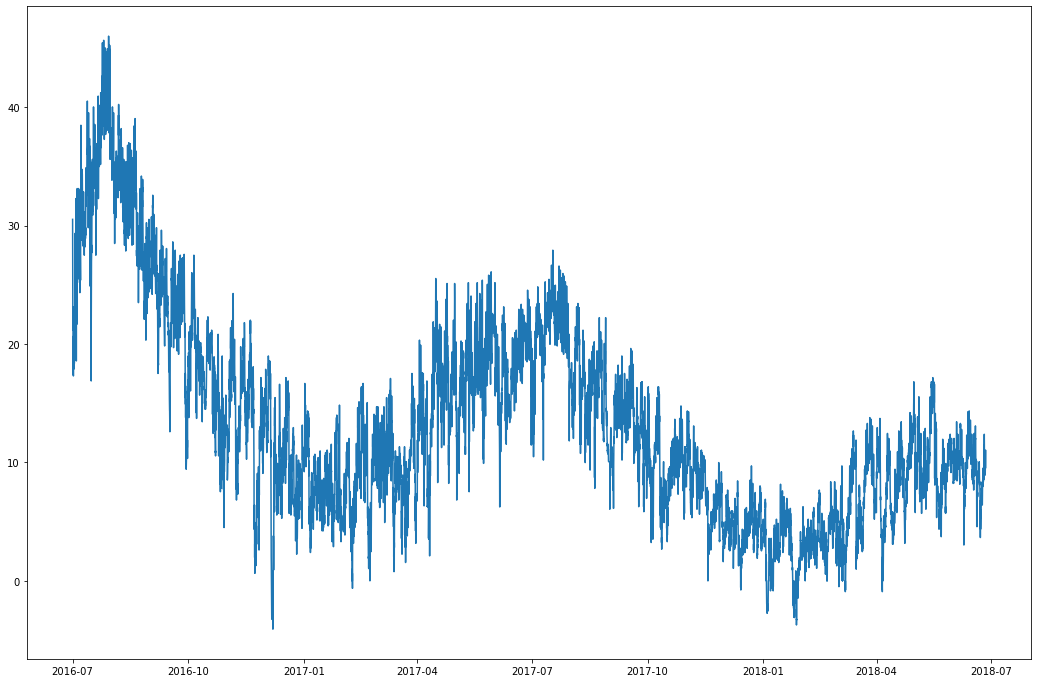

In [12]:
#overview of the time series
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(18,12))
plt.plot(rolledup_var)
plt.show()

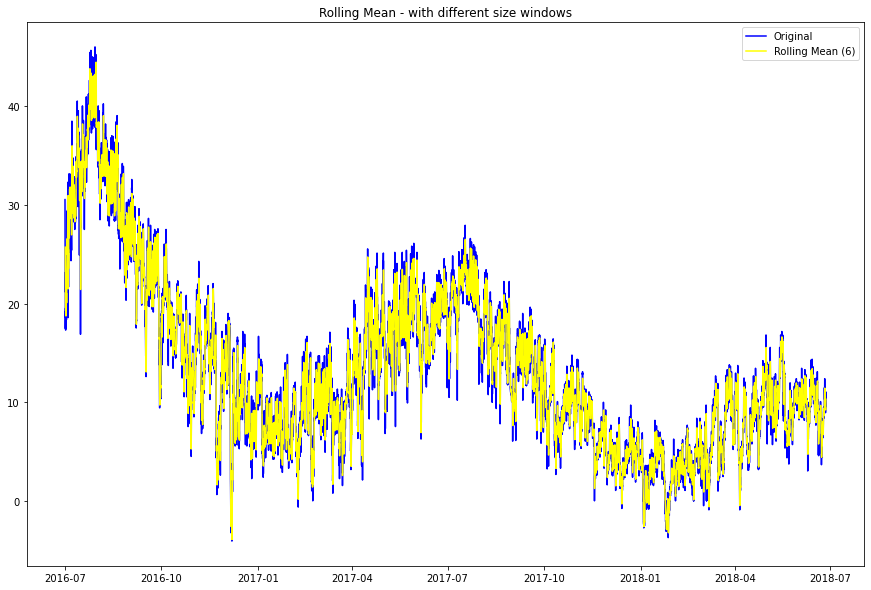

In [13]:
#Rolling mean of time series
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15,10

def test_stationarity(timeseries):
   #Determining rolling statistics
   rolmean6 = timeseries.rolling(window = 6).mean()

   #plotting rolling statistics
   orig = plt.plot(timeseries, color = 'blue', label = 'Original')
   mean6 = plt.plot(rolmean6, color = 'yellow', label = 'Rolling Mean (6)')
   plt.legend(loc = 'best')
   plt.title('Rolling Mean - with different size windows')
   plt.show()

test_stationarity(rolledup_var)

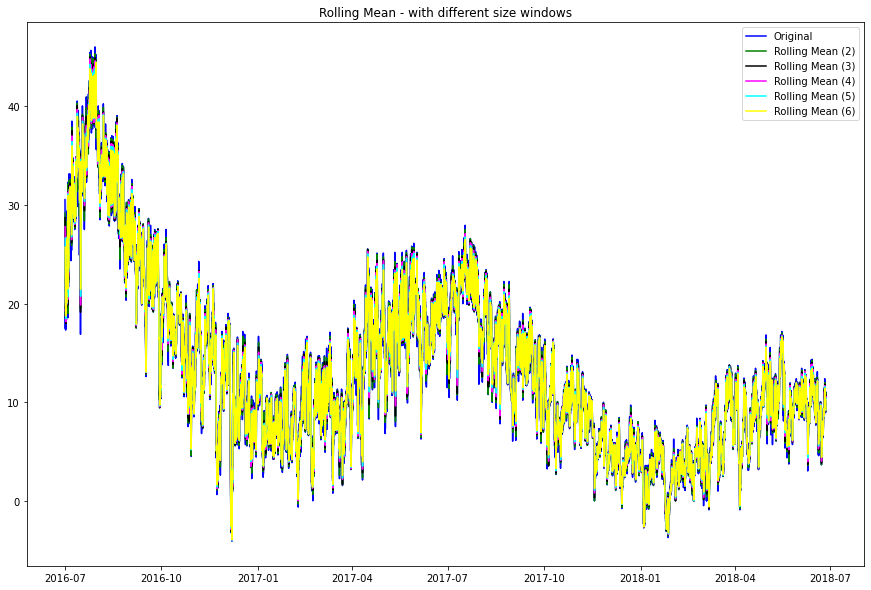

In [14]:
#variety of rolling means
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15,10

def test_stationarity(timeseries):

   #Determining rolling statistics
   #rolmean1 = timeseries.rolling(window = 1).mean()
   rolmean2 = timeseries.rolling(window = 2).mean()
   rolmean3 = timeseries.rolling(window = 3).mean()
   rolmean4 = timeseries.rolling(window = 4).mean()
   rolmean5 = timeseries.rolling(window = 5).mean()
   rolmean6 = timeseries.rolling(window = 6).mean()

   #plotting rolling statistics
   orig = plt.plot(timeseries, color = 'blue', label = 'Original')
   #mean1 = plt.plot(rolmean1, color = 'red', label = 'Rolling Mean (1)')
   mean2 = plt.plot(rolmean2, color = 'green', label = 'Rolling Mean (2)')
   mean3 = plt.plot(rolmean3, color = 'black', label = 'Rolling Mean (3)')
   mean4 = plt.plot(rolmean4, color = 'magenta', label = 'Rolling Mean (4)')
   mean5 = plt.plot(rolmean5, color = 'cyan', label = 'Rolling Mean (5)')
   mean6 = plt.plot(rolmean6, color = 'yellow', label = 'Rolling Mean (6)')
   plt.legend(loc = 'best')
   plt.title('Rolling Mean - with different size windows')
   plt.show()

test_stationarity(rolledup_var)

show date only up to 2017-11-01 00:00:00


C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


Auto Regression errors mae: 1.6653328287936218 mse: 4.834153156952778


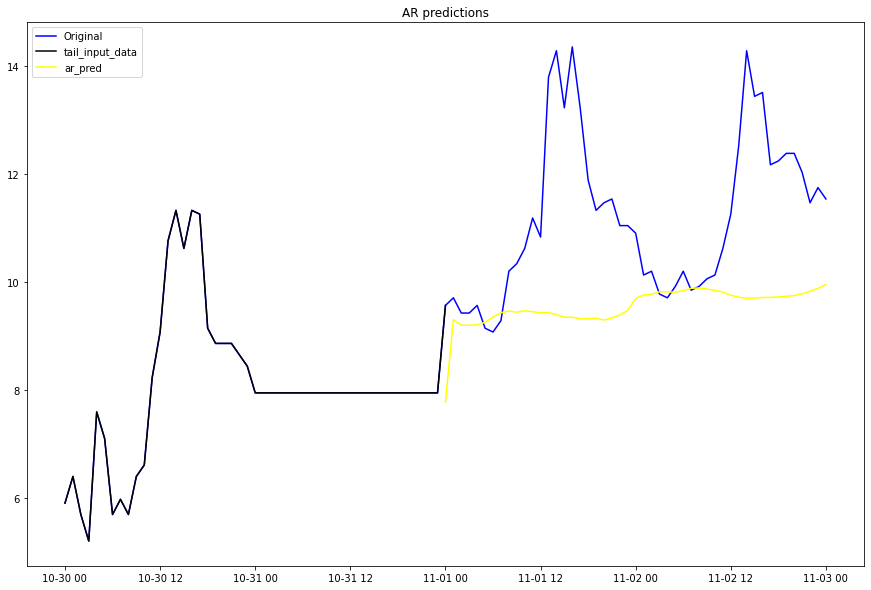

In [15]:
#Autoregression 
# Autoregression models the next step in the sequence as a linear function of the prior observed time steps

from statsmodels.tsa.ar_model import AR


print (f"show date only up to {startpred}")
#fit AR model
ar_model = AR(feeddata)#, missing='drop')#, freq=rolledup_var.index.inferred_freq)
model_fit = ar_model.fit(method='mle',maxiter=200 )


#make forecasing prediction

ar_pred = model_fit.predict(start=startpred, end=end)
#print results
#ar_pred

#plot of AR
def test_fitsar(timeseries, ar_pred):
   orig = plt.plot(timeseries[startpred-hoursoffset:end], color = 'blue', label = 'Original')
   feeddata = plt.plot(timeseries[startpred-hoursoffset:startpred], color = 'black', label = 'tail_input_data')
   #mean1 = plt.plot(rolmean1, color = 'red', label = 'Rolling Mean (1)')
   
   a1 = plt.plot(ar_pred, color = 'yellow', label = 'ar_pred')
   err=timeseries[startpred:end][var].values-ar_pred.values
   #errors (goodness of fit metrics)
   MSE=sum(err*err)/len(err)
   MAE=sum(abs(err))/len(err)
   print ("Auto Regression errors", 'mae:', MAE, 'mse:', MSE)
    
   plt.legend(loc = 'best')
   plt.title('AR predictions')
   plt.show()

test_fitsar(rolledup_var, ar_pred)

Now choose the remainder of this notebook.  SARIMAX can include a fit to an overall trend line through the data.
Run EITHER the cells commened TREND or NOTREND

In [16]:
#TREND
from statsmodels.tsa.statespace.sarimax import SARIMAX
#'t' is linear trend
smodel1 = SARIMAX(feeddata, trend='ct', order=(0,1,1), seasonal_order=(0,1,1,24))
#arima_model = ARIMA(feeddata, order=(2,1,1), seasonal=True)
model_fit1 = smodel1.fit()
#make predictions
extrapred=startpred
arima_models_trend['(0,1,1),(1,1,0,24)'] = model_fit1.predict(start=startpred, end=end, typ='levels')
#arima_pred.plot()

C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
#TREND
smodel3 = SARIMAX(feeddata, trend='ct', order=(1,2,1), seasonal_order=(1,1,1,24))
#arima_model = ARIMA(feeddata, order=(2,1,1), seasonal=True)
model_fit3 = smodel3.fit()
#make predictions
arima_models_trend['(1,2,1),(1,1,0,24)'] = model_fit3.predict(start=startpred, end=end, typ='levels')
#arima_pred.plot()

C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
#TREND
#'t' is linear trend, c constant trend
smodel2 = SARIMAX(feeddata, trend='ct', order=(2,2,1), seasonal_order=(1,1,1,24))
#arima_model = ARIMA(feeddata, order=(2,1,1), seasonal=True)
model_fit2 = smodel2.fit()
#make predictions
arima_models_trend['(2,2,1),(1,1,0,24)'] = model_fit2.predict(start=startpred, end=end, typ='levels')
#arima_pred.plot()

C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
#TREND
#'t' is linear trend, c constant trend
smodel2 = SARIMAX(feeddata, trend='ct', order=(0,2,1), seasonal_order=(1,1,1,24))
#arima_model = ARIMA(feeddata, order=(2,1,1), seasonal=True)
model_fit = smodel2.fit()
#make predictions
arima_models_trend['(0,2,1),(0,1,1,24)'] = model_fit.predict(start=startpred, end=end, typ='levels')
#arima_pred.plot()

C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#TREND
#SARIMAX with trend lines
#'t' is linear trend, c constant trend
import multiprocess as mp
from functools import partial

#Do not set number of Pools above system memory(GB)/8
# This is memory hungry
npools=1
pool = mp.Pool(npools)

pool = mp.Pool(npools)
from statsmodels.tsa.statespace.sarimax import SARIMAX



def funwrapper2 ( orders,data, startpred=startpred, end=end):
   import matplotlib.pyplot as plt
   from statsmodels.tsa.statespace.sarimax import SARIMAX
   
#'t' is linear trend
   smodel1 = SARIMAX(data, trend='ct', order=orders[0],seasonal_order=orders[1])
   model_fit1 = smodel1.fit()
   res=model_fit1.predict(start=startpred, end=end, typ='levels')
   plt.plot(res, color = 'b', label = str(orders), alpha=0.7)
   plt.legend(loc = 'best')
   plt.title(str(orders))
   plt.show()
   return  res
   



In [ ]:
#TREND
#Cell assuming a trend line has been desired
#Initial fit split out for testing 
orders=[        ( ( 2,2,1 ) , (0,0,0,0)) ]
results=[]

results= pool.map(partial(funwrapper2, data=feeddata), orders ) 
for i in range(0,len(results)):
    print (results[i], orders[i])
    arima_models_trend[str(orders[i]) +"trend"] = results[i]

In [ ]:
#TREND
#Cell assuming a trend line has been desired.
#Remaining fits
orders=[      ( ( 2,2,0 ) , (1,1,0,24)) ,
         ( ( 2,2,1 ) , (1,1,0,24)) ,  (( 2,2,1 ) , (1,2,0,24)) ,
         ( ( 2,2,1 ) , (2,1,0,24)) , ( ( 2,2,1 ) , (2,2,0,24)) ,
        ( ( 2,2,1 ) , (2,4,0,24)) 
         
       ]
results=[]
#orders=["as", "bs"]

results.append( pool.map(partial(funwrapper2, data=feeddata), orders ) )
pool.close()
print(results)

for i in range(0,len(results)):
    print (results[i], orders[i])
    arima_models_trend[str(orders[i])+"trend"] = results[i]

In [16]:
#NOTREND
results=[]
#SARIMAX with no trend lines
def funwrapper ( orders, data, startpred=startpred, end=end):
   from statsmodels.tsa.statespace.sarimax import SARIMAX
   import matplotlib.pyplot as plt
#'t' is linear trend
   smodel1 = SARIMAX(data, order=orders[0],seasonal_order=orders[1])
   model_fit1 = smodel1.fit()
   res=model_fit1.predict(start=startpred, end=end, typ='levels')
   plt.plot(res, color = 'b', label = str(orders), alpha=0.7)
   plt.legend(loc = 'best')
   plt.title(str(orders))
   plt.show()
   return  res

C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


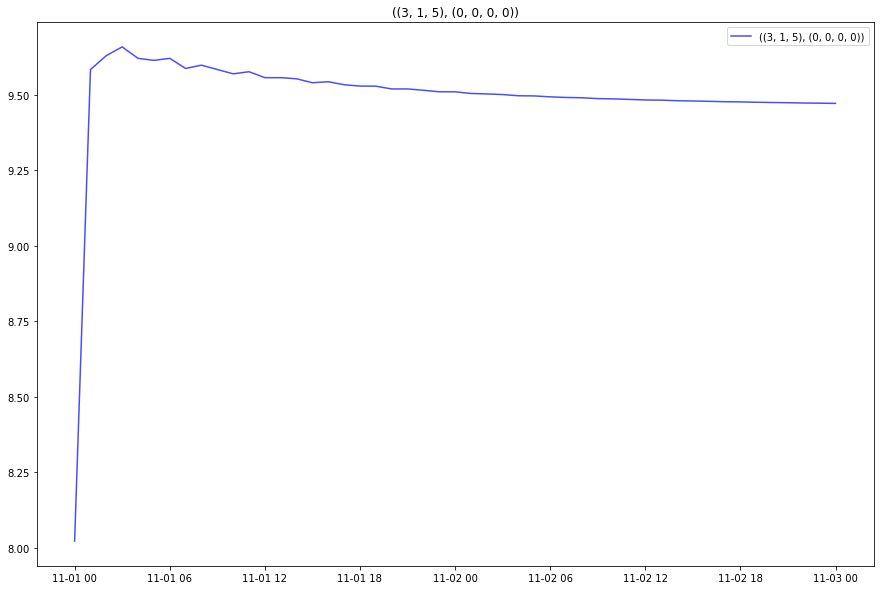

2017-11-01 00:00:00    8.021476
2017-11-01 01:00:00    9.584709
2017-11-01 02:00:00    9.630743
2017-11-01 03:00:00    9.659637
2017-11-01 04:00:00    9.621796
2017-11-01 05:00:00    9.615010
2017-11-01 06:00:00    9.621772
2017-11-01 07:00:00    9.588251
2017-11-01 08:00:00    9.599042
2017-11-01 09:00:00    9.584772
2017-11-01 10:00:00    9.570370
2017-11-01 11:00:00    9.577342
2017-11-01 12:00:00    9.557668
2017-11-01 13:00:00    9.557681
2017-11-01 14:00:00    9.553920
2017-11-01 15:00:00    9.540857
2017-11-01 16:00:00    9.544128
2017-11-01 17:00:00    9.534209
2017-11-01 18:00:00    9.529830
2017-11-01 19:00:00    9.529420
2017-11-01 20:00:00    9.520287
2017-11-01 21:00:00    9.520345
2017-11-01 22:00:00    9.515892
2017-11-01 23:00:00    9.510880
2017-11-02 00:00:00    9.510813
2017-11-02 01:00:00    9.505292
2017-11-02 02:00:00    9.503666
2017-11-02 03:00:00    9.501738
2017-11-02 04:00:00    9.497667
2017-11-02 05:00:00    9.497144
2017-11-02 06:00:00    9.494082
2017-11-

In [18]:
#NOTREND
#Cell assuming a trend line has NOT been desired
#If multiprocessing is needed.  
# Initial fit split out for testing  
import multiprocess as mp
#Do not set number of Pools above system memory(GB)/8
# This is memory hungry
npools=1
pool = mp.Pool(npools)
orders=[        ( (3,1,5 ) , (0,0,0,0) ) ]
results=[]
for i in orders:
    results.append(funwrapper(i, feeddata, startpred=startpred, end=end))
pool.close()
for i in range(0,len(results)):
    print (results[i], orders[i])
    arima_models[str(orders[i])] = results[i]
    

In [19]:
#NOTREND
#best with no trend
#If multiprocessing is needed.  
#Do not set number of Pools above system memory(GB)/8
# This is memory hungry
import multiprocess as mp
from functools import partial
pool = mp.Pool(npools)
from statsmodels.tsa.statespace.sarimax import SARIMAX

   #no good ( ( 2,2,1 ) , (1,1,0,24)) ,  ( ( 2,2,1 ) , (0,0,0,0)) ,


orders=[  (( 1,0,0 ) , (0,0,0,0)) , (( 2,0,0 ) , (0,0,0,0)) ,
          (( 2,2,1 ) , (0,0,0,0)) ,(( 1,2,1 ) , (0,0,0,0)) ,
           (( 2,1,1 ) , (0,0,0,0)) , (( 1,1,1 ) , (0,0,0,0)) ,
           (( 2,0,1 ) , (0,0,0,0)) , (( 1,0,1 ) , (0,0,0,0)) ,
          (( 0,0,1 ) , (0,0,0,0)) , (( 1,1,1 ) , (0,0,0,0)) ,
          (( 0,2,1 ) , (0,0,0,0)) , (( 0,1,2 ) , (0,0,0,0)) 
         
       ]

results=[]

#orders=["as", "bs"]


results= pool.map(partial(funwrapper, data=feeddata), orders )

#for i in orders:
#    results.append(funwrapper(orders, feeddata, startpred=startpred, end=end))
print(results)

for i in range(0,len(results)):
    print (results[i], orders[i])
    arima_models[str(orders[i])] = results[i]
pool.close()


[2017-11-01 00:00:00    7.935987
2017-11-01 01:00:00    9.551339
2017-11-01 02:00:00    9.535703
2017-11-01 03:00:00    9.520093
2017-11-01 04:00:00    9.504509
2017-11-01 05:00:00    9.488950
2017-11-01 06:00:00    9.473416
2017-11-01 07:00:00    9.457908
2017-11-01 08:00:00    9.442426
2017-11-01 09:00:00    9.426968
2017-11-01 10:00:00    9.411536
2017-11-01 11:00:00    9.396129
2017-11-01 12:00:00    9.380748
2017-11-01 13:00:00    9.365391
2017-11-01 14:00:00    9.350060
2017-11-01 15:00:00    9.334754
2017-11-01 16:00:00    9.319473
2017-11-01 17:00:00    9.304217
2017-11-01 18:00:00    9.288986
2017-11-01 19:00:00    9.273780
2017-11-01 20:00:00    9.258598
2017-11-01 21:00:00    9.243442
2017-11-01 22:00:00    9.228310
2017-11-01 23:00:00    9.213203
2017-11-02 00:00:00    9.198121
2017-11-02 01:00:00    9.183064
2017-11-02 02:00:00    9.168031
2017-11-02 03:00:00    9.153023
2017-11-02 04:00:00    9.138039
2017-11-02 05:00:00    9.123080
2017-11-02 06:00:00    9.108146
2017-11

2017-11-01 00:00:00     7.123130
2017-11-01 01:00:00     9.227718
2017-11-01 02:00:00     9.066681
2017-11-01 03:00:00     8.696366
2017-11-01 04:00:00    10.014728
2017-11-01 05:00:00     9.810732
2017-11-01 06:00:00    10.429099
2017-11-01 07:00:00     9.868984
2017-11-01 08:00:00    10.753411
2017-11-01 09:00:00    10.837399
2017-11-01 10:00:00    10.951017
2017-11-01 11:00:00    10.909333
2017-11-01 12:00:00    10.621307
2017-11-01 13:00:00    10.833259
2017-11-01 14:00:00    11.105047
2017-11-01 15:00:00    10.370475
2017-11-01 16:00:00    10.687140
2017-11-01 17:00:00    10.525446
2017-11-01 18:00:00     9.945515
2017-11-01 19:00:00    10.365915
2017-11-01 20:00:00    10.690532
2017-11-01 21:00:00    11.431723
2017-11-01 22:00:00    11.781464
2017-11-01 23:00:00    12.224142
2017-11-02 00:00:00    14.746587
2017-11-02 01:00:00    13.966365
2017-11-02 02:00:00    14.214131
2017-11-02 03:00:00    14.041547
2017-11-02 04:00:00    14.232958
2017-11-02 05:00:00    14.283385
2017-11-02

C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


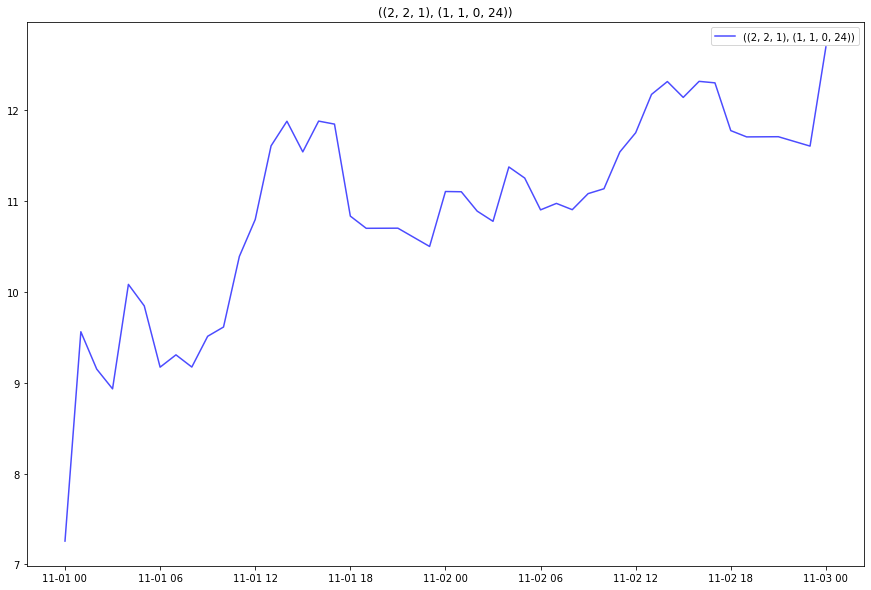

2017-11-01 00:00:00     7.255850
2017-11-01 01:00:00     9.560751
2017-11-01 02:00:00     9.149634
2017-11-01 03:00:00     8.931983
2017-11-01 04:00:00    10.082200
2017-11-01 05:00:00     9.845689
2017-11-01 06:00:00     9.170762
2017-11-01 07:00:00     9.306394
2017-11-01 08:00:00     9.172121
2017-11-01 09:00:00     9.510832
2017-11-01 10:00:00     9.612814
2017-11-01 11:00:00    10.390414
2017-11-01 12:00:00    10.796352
2017-11-01 13:00:00    11.607565
2017-11-01 14:00:00    11.878571
2017-11-01 15:00:00    11.541185
2017-11-01 16:00:00    11.879897
2017-11-01 17:00:00    11.846947
2017-11-01 18:00:00    10.833943
2017-11-01 19:00:00    10.699674
2017-11-01 20:00:00    10.700337
2017-11-01 21:00:00    10.701000
2017-11-01 22:00:00    10.600344
2017-11-01 23:00:00    10.499689
2017-11-02 00:00:00    11.104684
2017-11-02 01:00:00    11.102099
2017-11-02 02:00:00    10.889056
2017-11-02 03:00:00    10.776580
2017-11-02 04:00:00    11.375146
2017-11-02 05:00:00    11.252866
2017-11-02

In [20]:
#NOTREND
import multiprocess as mp
from functools import partial
#These fits needed >8GB each 
pool = mp.Pool(1)
from statsmodels.tsa.statespace.sarimax import SARIMAX

orders=[                (( 2,2,1 ) , (1,2,0,24)) ,
         ( ( 2,2,1 ) , (2,1,0,24)) ] 
            
results= pool.map(partial(funwrapper, data=feeddata), orders ) 
for i in range(0,len(results)):
    print (results[i], orders[i])
    arima_models[str(orders[i])] = results[i]
    
    
orders=[ ( ( 2,2,1 ) , (1,1,0,24)), ]
results=[]

for i in orders:
    results.append(funwrapper(i, feeddata, startpred=startpred, end=end))
for i in range(0,len(results)):
    print (results[i], orders[i])
    arima_models[str(orders[i])] = results[i]
pool.close()


    

In [21]:
#NOTREND
#ARIMA gives same results as SARIMAX
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(feeddata, order=(2,2,1))
model_fit = arima_model.fit()
arima_models['(2,2,1)'] = model_fit.predict(start=startpred, end=end, typ='levels')
arima_models['((2, 2, 1), (0, 0, 0, 0))']-arima_models['(2,2,1)']


C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\DellAdmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


2017-11-01 00:00:00    0.0
2017-11-01 01:00:00    0.0
2017-11-01 02:00:00    0.0
2017-11-01 03:00:00    0.0
2017-11-01 04:00:00    0.0
2017-11-01 05:00:00    0.0
2017-11-01 06:00:00    0.0
2017-11-01 07:00:00    0.0
2017-11-01 08:00:00    0.0
2017-11-01 09:00:00    0.0
2017-11-01 10:00:00    0.0
2017-11-01 11:00:00    0.0
2017-11-01 12:00:00    0.0
2017-11-01 13:00:00    0.0
2017-11-01 14:00:00    0.0
2017-11-01 15:00:00    0.0
2017-11-01 16:00:00    0.0
2017-11-01 17:00:00    0.0
2017-11-01 18:00:00    0.0
2017-11-01 19:00:00    0.0
2017-11-01 20:00:00    0.0
2017-11-01 21:00:00    0.0
2017-11-01 22:00:00    0.0
2017-11-01 23:00:00    0.0
2017-11-02 00:00:00    0.0
2017-11-02 01:00:00    0.0
2017-11-02 02:00:00    0.0
2017-11-02 03:00:00    0.0
2017-11-02 04:00:00    0.0
2017-11-02 05:00:00    0.0
2017-11-02 06:00:00    0.0
2017-11-02 07:00:00    0.0
2017-11-02 08:00:00    0.0
2017-11-02 09:00:00    0.0
2017-11-02 10:00:00    0.0
2017-11-02 11:00:00    0.0
2017-11-02 12:00:00    0.0
2

Make the relevant plots of the different forecasts 
Choose modelset as arima_models or arima_models_trend to plot
to choose whether to plot the selection of models including trend lines or not.

reject  ((2, 2, 1), (1, 2, 0, 24))
reject  ((2, 2, 1), (2, 1, 0, 24))
reject  ((2, 2, 1), (1, 1, 0, 24))
reject  (2,2,1)


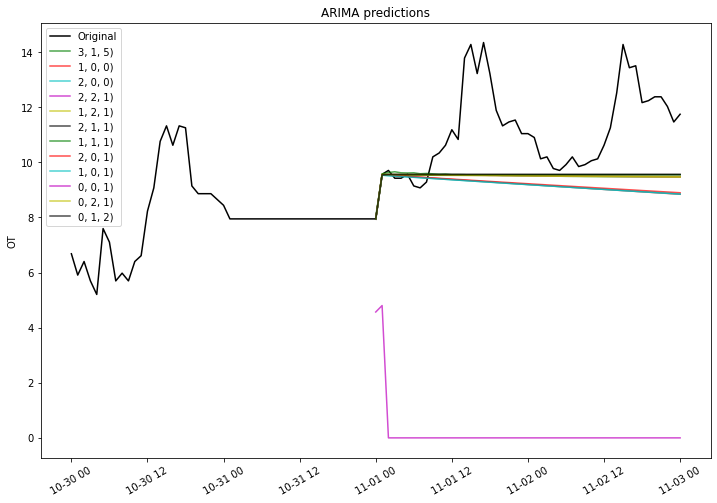

1
3, 1, 5) mae: 1.6904161795729113 mse: 4.897965835206352
1, 0, 0) mae: 1.984179208448611 mse: 6.296905382764642
2, 0, 0) mae: 1.9860586565757727 mse: 6.305461602953353
2, 2, 1) mae: 1.6824664020372493 mse: 4.89498003146969
1, 2, 1) mae: 1.6900343265113396 mse: 4.927652707456077
2, 1, 1) mae: 1.6386890244634726 mse: 4.713494900597012
1, 1, 1) mae: 1.6484807322088197 mse: 4.754713533387523
2, 0, 1) mae: 1.9577204513818678 mse: 6.163329376008756
1, 0, 1) mae: 1.985873555525555 mse: 6.304552358880228
0, 0, 1) mae: 10.917750327612518 mse: 123.3259364712234
0, 2, 1) mae: 1.674365623602856 mse: 4.861964292393385
0, 1, 2) mae: 1.6408437958105453 mse: 4.722628369786186


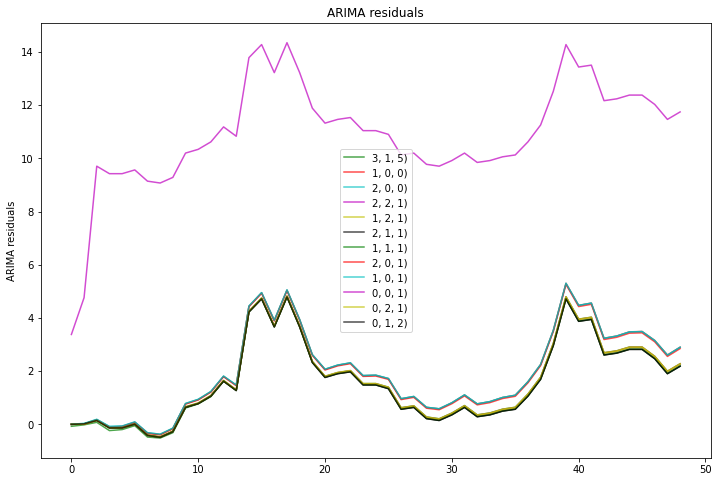

[array([-0.07247576, -0.01770814,  0.0772568 , -0.23363723, -0.195796  ,
        -0.04800943, -0.47677152, -0.51325167, -0.31304139,  0.61522742,
         0.77062925,  1.04465797,  1.62733207,  1.2753194 ,  4.23408052,
         4.73914254,  3.68087224,  4.81679072,  3.69516995,  2.35957985,
         1.80571272,  1.94665531,  2.02110756,  1.53311981,  1.53318644,
         1.39870855,  0.62633443,  0.69826156,  0.28033316,  0.2108563 ,
         0.42491801,  0.70799144,  0.35797359,  0.43079397,  0.57269487,
         0.64435132,  1.138207  ,  1.772914  ,  3.04070597,  4.79971231,
         3.95666078,  4.02907572,  2.69270904,  2.76380659,  2.90571814,
         2.90633467,  2.55532233,  1.9938977 ,  2.27557962]),
 array([ 0.0130126 ,  0.01566128,  0.17229672, -0.09409377, -0.07850927,
         0.07805046, -0.32841596, -0.38290852, -0.15642538,  0.77303153,
         0.92946337,  1.22587029,  1.80425254,  1.46760869,  4.43793986,
         4.94524563,  3.90552738,  5.0467829 ,  3.93601456,  2

In [29]:
#NOTREND (default)
#Choose arima_models or arima_models_trend to plot
modelset = arima_models


from numpy import roll


rv=rolledup_var.copy()
#Model is always offset by 1
rv[var]=roll(rv[var],1)
#test_fits(rolledup_var, {'(0,0,0)': arima_models['(0,0,0)'], '(0,2,0)': arima_models['(0,2,0)']})
arima=True
test_fits(rv, modelset, arima, end)
#rolledup_var[startpred-hoursoffset:]-arima_models['(0,2,0)']

reject  ((3, 1, 5), (0, 0, 0, 0))
reject  ((1, 0, 0), (0, 0, 0, 0))
reject  ((2, 0, 0), (0, 0, 0, 0))
reject  ((2, 2, 1), (0, 0, 0, 0))
reject  ((1, 2, 1), (0, 0, 0, 0))
reject  ((2, 1, 1), (0, 0, 0, 0))
reject  ((1, 1, 1), (0, 0, 0, 0))
reject  ((2, 0, 1), (0, 0, 0, 0))
reject  ((1, 0, 1), (0, 0, 0, 0))
reject  ((0, 0, 1), (0, 0, 0, 0))
reject  ((0, 2, 1), (0, 0, 0, 0))
reject  ((0, 1, 2), (0, 0, 0, 0))
reject  (2,2,1)


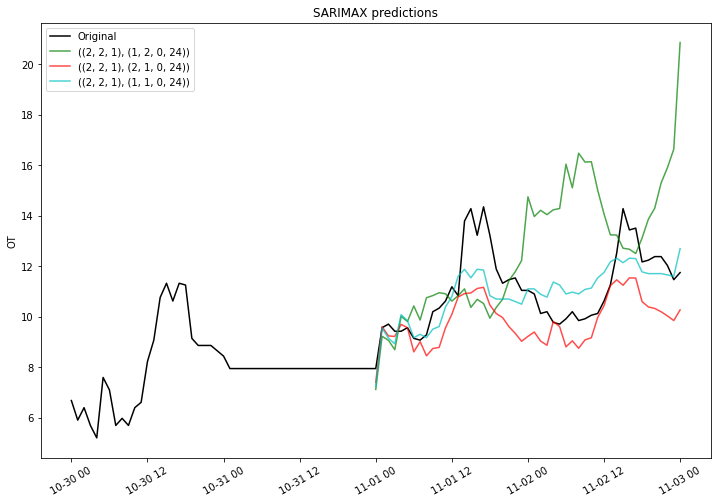

1
((2, 2, 1), (1, 2, 0, 24)) mae: 2.498277241540596 mse: 10.751104432723475
((2, 2, 1), (2, 1, 0, 24)) mae: 1.2992724748101947 mse: 2.5038339462423775
((2, 2, 1), (1, 1, 0, 24)) mae: 0.8667337357260215 mse: 1.1601166197216324


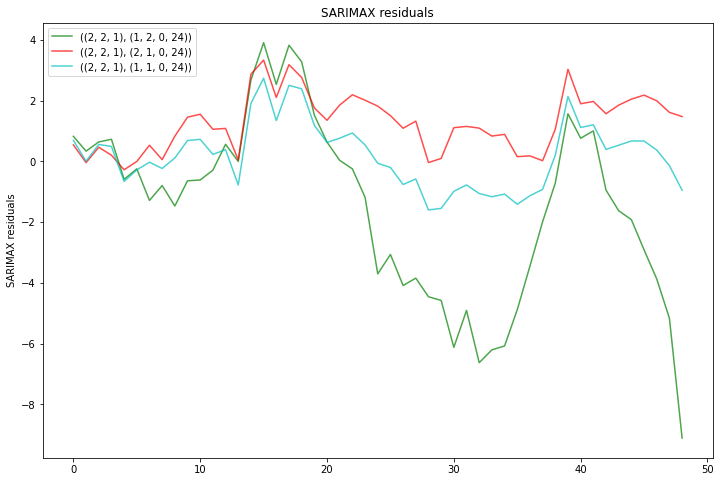

[array([ 8.25870138e-01,  3.39282083e-01,  6.41318753e-01,  7.29633297e-01,
        -5.88728274e-01, -2.43731392e-01, -1.28409887e+00, -7.93984579e-01,
        -1.46741050e+00, -6.37399550e-01, -6.10017086e-01, -2.87333397e-01,
         5.63693531e-01, -2.58735386e-04,  2.68295284e+00,  3.90952471e+00,
         2.53786071e+00,  3.82555390e+00,  3.27948506e+00,  1.52308482e+00,
         6.35468115e-01,  3.52769596e-02, -2.44464045e-01, -1.18014281e+00,
        -3.70258735e+00, -3.06236441e+00, -4.08413071e+00, -3.84154676e+00,
        -4.45495859e+00, -4.57538511e+00, -6.12059974e+00, -4.90300723e+00,
        -6.62478269e+00, -6.20303140e+00, -6.07496124e+00, -4.88225030e+00,
        -3.44739880e+00, -1.98463922e+00, -7.11638508e-01,  1.56762737e+00,
         7.63392506e-01,  1.00539907e+00, -9.45091284e-01, -1.62367073e+00,
        -1.91760103e+00, -2.91110013e+00, -3.87079500e+00, -5.16510749e+00,
        -9.10594401e+00]),
 array([ 5.45280547e-01, -3.95118305e-02,  4.66398962e-01,  2

In [30]:
#NOTREND (default)
#Choose arima_models or arima_models_trend to plot
arima=False
modelset = arima_models


from numpy import roll


rv=rolledup_var.copy()
#Model is always offset by 1
rv[var]=roll(rv[var],1)


test_fits(rv, modelset, arima, end)
#rolledup_var[startpred-hoursoffset:]-arima_models['(0,2,0)']

Perform the seasonal decomposition of the input data to demonstrate the daily periodicity
and yearly trends

<AxesSubplot:xlabel='date'>

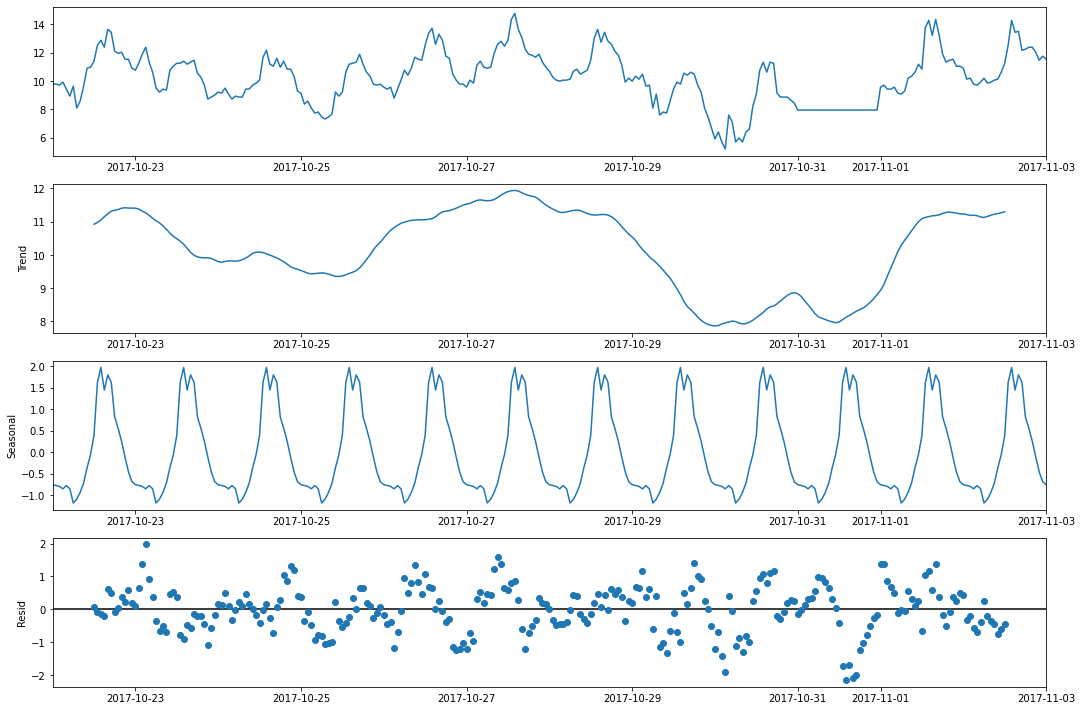

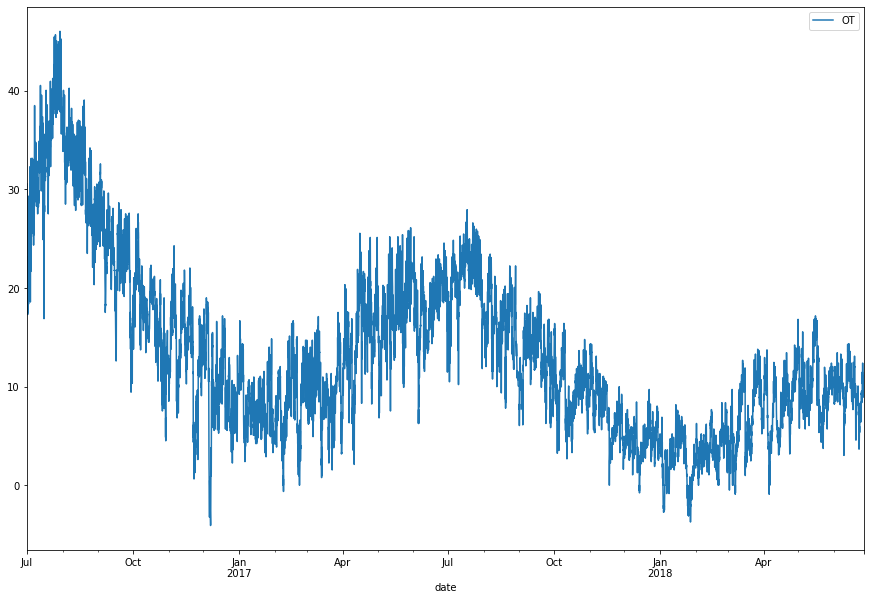

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(rolledup_var[startpred-hoursoffset*5:end], model="additive")
decompose_data.plot();
rolledup_var.plot()

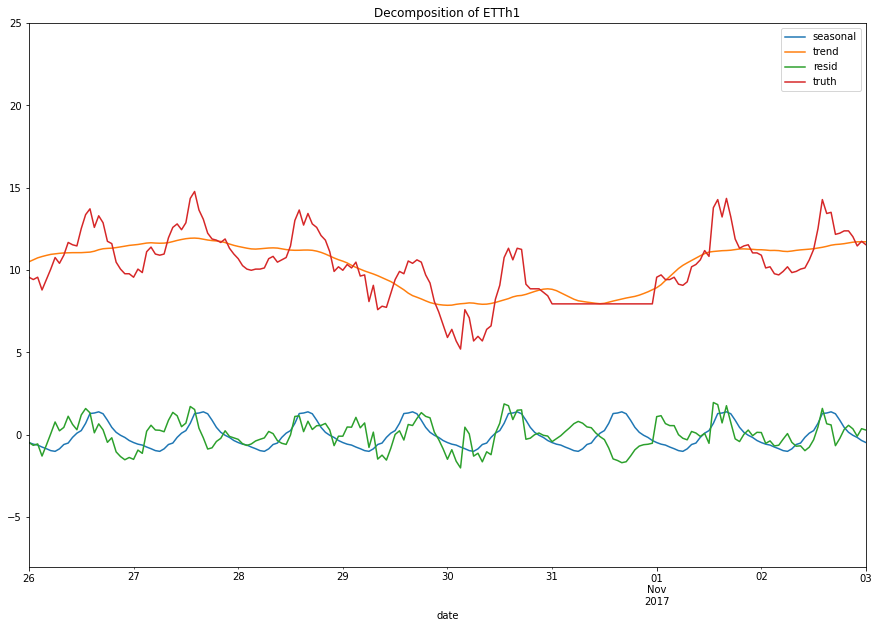

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
lims=(startpred-hoursoffset*3, end)
decompose_data = seasonal_decompose(rolledup_var, model="additive")
decompose_data.seasonal.plot(xlim=lims)
decompose_data.trend.plot(xlim=lims)
decompose_data.resid.plot(xlim=lims)
decompose_data._observed.plot(xlim=lims, ylim=(-8,25), label="truth")
plt.legend(loc = 'best')
plt.title(label="Decomposition of ETTh1",  loc = 'center')
#rolledup_var.plot(xlim=(startpred-hoursoffset*3, end))
plt.show()

Finally exponential smoothing (not used in analysis write up)

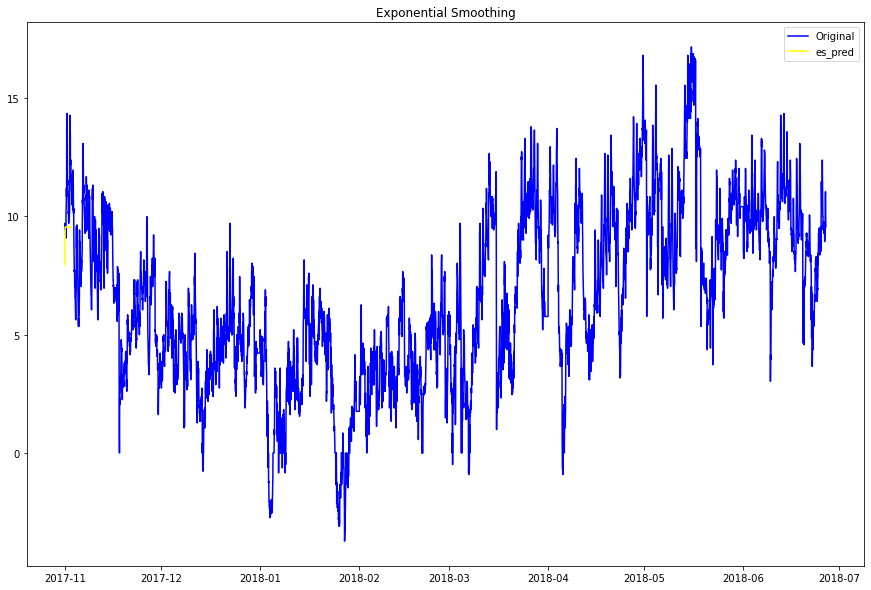

In [27]:
#Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#fit ES model
ar_model = ExponentialSmoothing(feeddata, 
                                freq=rolledup_var.index.inferred_freq
                               )

model_fit = ar_model.fit()

#make forecasing prediction
es_pred = model_fit.predict(start=startpred, end=end)

#print results
es_pred
#es_pred.plot()

def test_fitsex(timeseries):
   orig = plt.plot(timeseries[extrapred:], color = 'blue', label = 'Original')
   #mean1 = plt.plot(rolmean1, color = 'red', label = 'Rolling Mean (1)')
   
   a1 = plt.plot(es_pred, color = 'yellow', label = 'es_pred')
    
   plt.legend(loc = 'best')
   plt.title('Exponential Smoothing')
   plt.show()

test_fitsex(rolledup_var)

In [ ]:
#!conda install -c conda-forge pmdarima

In [ ]:
# Not used
#from pyramid.arima import auto_arima
#stepwise_model = auto_arima(rolledup_var, start_p=1, start_q=1,
#                           max_p=3, max_q=3, m=12,
#                           start_P=0, seasonal=True,
#                           d=1, D=1, trace=True,
#                           error_action='ignore',  
#                           suppress_warnings=True, 
#                           stepwise=True)
#print(stepwise_model.aic())